# Mapa das escolas do RS por taxa de distorção do ensino médio por série

In [4]:
%matplotlib inline
import pandas as pd
import folium

In [5]:
# carregar dados do arquivo csv
df = pd.read_csv('fee-2013-mun-taxa-de-distorcao-idade-serie-total-102524.csv', encoding='latin1', skiprows=1, decimal=',')

In [6]:
df = df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)': 'tx_distorcao'})
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.860759999990,-54.167059999990,25.7
1,Água Santa,4300059,-28.167200000000,-52.030999999990,14.7
2,Agudo,4300109,-29.644700000000,-53.251500000000,26.4
3,Ajuricaba,4300208,-28.234200000000,-53.775700000000,24.1
4,Alecrim,4300307,-27.657900000000,-54.764899999990,18.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null object
longitude       495 non-null object
tx_distorcao    495 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.4+ KB


In [8]:
# 10 maior taxas de distorção do ensino médio
df.nlargest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
307,Pedras Altas,4314175,-31.721699999990,-53.583799999990,56.0
316,Pinheiro Machado,4314506,-31.579400000000,-53.379800000000,53.9
17,Arambaré,4300851,-30.909300000000,-51.504600000000,52.8
140,Eldorado do Sul,4306767,-30.084700000000,-51.618699999990,51.9
35,Barra do Quaraí,4301875,-30.202900000000,-57.549700000000,51.5
393,São José do Norte,4318507,-32.015099999990,-52.033099999990,49.4
413,São Valério do Sul,4319737,-27.790600000000,-53.936799999990,49.2
193,Hulha Negra,4309654,-31.406700000000,-53.866700000000,49.0
106,Chuí,4305439,-33.686599999990,-53.459400000000,48.6
233,Lavras do Sul,4311502,-30.807099999990,-53.893099999990,47.7


In [9]:
# 10 menores taxas de distorção do ensino médio
df.nsmallest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
490,Vista Alegre do Prata,4323606,-28.805199999990,-51.794600000000,2.6
375,Santo Antônio do Palma,4317558,-28.495600000000,-52.026699999990,4.3
28,Áurea,4301552,-27.693600000000,-52.050500000000,5.8
268,Nicolau Vergueiro,4312674,-28.529800000000,-52.467599999990,7.0
128,Derrubadas,4306320,-27.264199999990,-53.864500000000,7.4
119,Cotiporã,4305959,-28.989100000000,-51.697099999990,7.5
68,Campestre da Serra,4303673,-28.792600000000,-51.094099999990,7.6
476,Vanini,4322558,-28.475800000000,-51.844700000000,7.8
236,Linha Nova,4311643,-29.467900000000,-51.200299999990,8.0
392,São José do Inhacorá,4318499,-27.725100000000,-54.127499999990,8.0


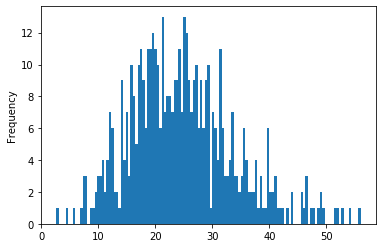

In [13]:
df['tx_distorcao'].plot.hist(127)

In [35]:
# Quantidade de municipios com taxas de distorção <= 10
melhores = df[df['tx_distorcao'] <= 10]
melhores.count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [44]:
piores = df[df['tx_distorcao'] >= 40]
piores.count()

Município       32
ibge            32
latitude        32
longitude       32
tx_distorcao    32
dtype: int64

In [25]:
# criar um mapa do Rio grande do sul, com as coordenadas do estado

mapa_rs = folium.Map(
    location=['-30.338745', '-52.8490632'],
    zoom_start=6
)
mapa_rs

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null object
longitude       495 non-null object
tx_distorcao    495 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.4+ KB


In [38]:
# percorres os melhores escolas e marcar no mapa

for indice, municipio in melhores.iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='green')
    ).add_to(mapa_rs)
mapa_rs

In [43]:
# piores cidades com taxa de distorção no mapa

for indice, municipio in piores.iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='red')
    ).add_to(mapa_rs)
mapa_rs